### Generating Association Rule from Frequent Itemsets

Association analysis is relatively light on the math concepts and easy to explain to non-technical people. In addition, it is an unsupervised learning tool that looks for hidden patterns so there is limited need for data prep and feature engineering


Use of apriori function in mlxtend.association
__ pip install mlxtend  

In [15]:
import pandas as pd
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

df=pd.DataFrame(te_ary, columns=te.columns_)

df.head()

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


### Apriori functions and support 

It is the measure of frequency or abundance of an item in a dataset
We define a support at 60 %
Support =  P(itemsets) / N

Itemsets have to be in 60 % of baskets

In [2]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


Here, the support had deleted Apple, with only one frequence (1/5 = 20% )
We have generated 10 rules ! 

With a support at 20%, the number of rules is 148 ...

### Let's specify our metric of confidence 

Confidence gives the probability of consequent in a transaction given the presence of antecedent (probabilité conditionnelle). At maximum, the confidence threshold can be 1

We define a confidence threshold at 70 %, the consequent is bought in 70 % of total cases  when the antecedent is bought

In retail, we can set a threshold at 50 %

In [10]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.000000
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf


For each Eggs' purchase act, we have a Kidney Beans purchase act, the confidence threhsold is at 1

We can have the <b>lift</b> threshold, 
Lift is the ratio of the observed support to that expected if the two rules were independent (see wikipedia). The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

For instance, for Eggs and Onion (case 2) , in 3 on 4 eggs' purchase act, i bought onion, but i can say that when I purchase oinion , I've bought always eggs ! 0.75/0.6 = 1.25, -> Surcroît d’occurrence du conséquent quand l’antécédent est présent

#### A lift with a trehshold at 1 is useless ! 



### An other exemple with real product description 

https://pbpython.com/market-basket-analysis.html

In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_excel('Online Retail FR.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


### CleanUp

* First, some of the descriptions have spaces that need to be removed. 
* We’ll also drop the rows that don’t have invoice numbers and 
* remove the credit transactions (those with invoice numbers containing C).

In [33]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo']=df['InvoiceNo'].astype('str')
df=df.loc[~df.InvoiceNo.str.startswith('C')]

We need to consolidate the items into 1 transaction per row with each product 1 hot encoded

In [36]:
basket=df.pivot_table(index='InvoiceNo',columns='Description',values='Quantity',fill_value=0)
basket_sets.head(15)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


on supprime le produit POSTCODE

In [37]:
basket_sets.drop('POSTAGE', inplace=True, axis=1)

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% (this number was chosen so that I could get enough useful examples):

In [42]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


We can filter the dataframe using standard pandas code. In this case, look for a large lift (6) and high confidence (.8):

In [43]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
20,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
22,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796


In [45]:
print(basket['ALARM CLOCK BAKELIKE GREEN'].sum())
print(basket['ALARM CLOCK BAKELIKE RED'].sum())

340
316


### AUCHAN RETAIL use case

In [3]:
hb = pd.read_excel('HB 201811.xlsx')
hb.head(5)

,id_day,sales_channel_unique_code,basket_unique_code,person_unique_code,prd_sku_unique_code,prd_item_unique_code,nomenclature_lvl1_sde,nomenclature_lvl2_sde,nomenclature_lvl3_sde,nomenclature_lvl4_sde,prd_sku_sde,BRAND_SECONDARY,top_ownbrand,product_qty,final_amt_w_disc_w_tax
0,2018-11-16,1,6894000050000011246,57912735,1454927,8717163525555,PERFUMERY - BEAUTY,HAIR STYLING,HAIR STYLING - FREEZE,HAIR STYLING GELS,TIMOTEI GEL EXTRA FIXANT MAXIPOT 150ML,TIMOTEI,0,1,4.04
1,2018-11-16,1,6894000050000003596,166068591,1454927,8717163525555,PERFUMERY - BEAUTY,HAIR STYLING,HAIR STYLING - FREEZE,HAIR STYLING GELS,TIMOTEI GEL EXTRA FIXANT MAXIPOT 150ML,TIMOTEI,0,1,4.04
2,2018-11-28,1,6906000060000004836,173543481,1454927,8717163525555,PERFUMERY - BEAUTY,HAIR STYLING,HAIR STYLING - FREEZE,HAIR STYLING GELS,TIMOTEI GEL EXTRA FIXANT MAXIPOT 150ML,TIMOTEI,0,1,4.04
3,2018-11-30,1,6908000050000001176,18093229,1454927,8717163525555,PERFUMERY - BEAUTY,HAIR STYLING,HAIR STYLING - FREEZE,HAIR STYLING GELS,TIMOTEI GEL EXTRA FIXANT MAXIPOT 150ML,TIMOTEI,0,1,4.04
4,2018-11-30,1,6908000060000007338,103685819,1454927,8717163525555,PERFUMERY - BEAUTY,HAIR STYLING,HAIR STYLING - FREEZE,HAIR STYLING GELS,TIMOTEI GEL EXTRA FIXANT MAXIPOT 150ML,TIMOTEI,0,1,4.04


In [35]:
hb = pd.read_csv('OneYearNoyelles.csv')
print(hb.head(5))
print(hb.shape)

   sid_customer nomenclature_lvl1_sde nomenclature_lvl2_sde  \
0     106567230    PERFUMERY - BEAUTY             HAIR CARE   
1     106567230   PERFUMERY - HYGIENE        DENTAL HYGIENE   
2     106567230   PERFUMERY - HYGIENE        BODY CLEANSING   
3     104096584   PERFUMERY - HYGIENE        DENTAL HYGIENE   
4     104096584    PERFUMERY - BEAUTY             HAIR CARE   

   nomenclature_lvl3_sde  nomenclature_lvl4_sde  \
0               SHAMPOOS   SHAMPOOS - CLASSIC #   
1            TOOTHPASTES          TOOTHPASTES #   
2  SHOWER GELS AND FOAMS  SHOWER GEL - ADULTS #   
3            TOOTHPASTES          TOOTHPASTES #   
4               SHAMPOOS         SHAMPOOS - DRY   

                                         prd_sku_sde         marque_ds  \
0               H ET S SHAMP 2 EN 1 MENTHOL3 X255 ML  HEAD & SHOULDERS   
1        COLGATE DENTIFRICE MAXFRESHSHOCKWAVE 3X75ML           COLGATE   
2        CADUM DOUCHE SURDOUX TALCSANS SAVON 3X400ML             CADUM   
3                 

In [115]:
hb['prd_sku_sde'] = hb['prd_sku_sde'].str.strip()
hb['nomenclature_lvl4_sde'] = hb['nomenclature_lvl4_sde'].str.strip()
hb['nomenclature_lvl3_sde'] = hb['nomenclature_lvl3_sde'].str.strip()
hb['nomenclature_lvl2_sde'] = hb['nomenclature_lvl2_sde'].str.strip()
hb['marque_ds'] = hb['marque_ds'].str.strip()
hb['LVL4_marque'] = hb['nomenclature_lvl4_sde'] + hb['marque_ds']
hb['LVL2_marque'] = hb['nomenclature_lvl2_sde'] + " _ " + hb['marque_ds']
#hb['basket_unique_code'] = hb['basket_unique_code'].astype('str')
#hb.dropna(axis=0, subset=['basket_unique_code'], inplace=True) #au cas où

#hb = hb[hb['sid_customer'] >=0] #suppression des non identifie
hb['sid_customer'] = hb['sid_customer'].astype('str')
hb.dropna(axis=0, subset=['sid_customer'], inplace=True)

hb.head(5)
print(hb.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640180 entries, 0 to 640179
Data columns (total 11 columns):
sid_customer             640180 non-null object
nomenclature_lvl1_sde    632365 non-null object
nomenclature_lvl2_sde    632365 non-null object
nomenclature_lvl3_sde    632365 non-null object
nomenclature_lvl4_sde    632365 non-null object
prd_sku_sde              632365 non-null object
marque_ds                640180 non-null object
product_qty              640180 non-null int64
nb_item_per_customer     640180 non-null int64
LVL4_marque              632365 non-null object
LVL2_marque              632365 non-null object
dtypes: int64(2), object(9)
memory usage: 58.6+ MB
None


In [116]:
#passage des quantites en binaire
hb['product_qty']=list(map(lambda x: 1 if x>=1 else 0,hb.product_qty))

In [117]:
#suppresion des clients avec un seul item
import numpy as np 
hb['nb_item_per_customer'] = hb.groupby("sid_customer")["product_qty"].transform(np.size)
basketHB = hb.query('nb_item_per_customer > 2')                            

In [111]:
basketHB.shape

(601468, 11)

### Statistiques descriptives

In [39]:
hb['nomenclature_lvl4_sde'].nunique()

81

In [78]:
hb['LVL4_marque'].nunique()

559

In [40]:
hb['nomenclature_lvl4_sde'].value_counts().sort_values(ascending=False).head(15)

SHOWER GEL - ADULTS #                   98632
SHAMPOOS - CLASSIC #                    66606
TOOTHPASTES #                           62404
SANITARY TOWELS #                       41560
DEODORANT WOMEN SPRAY                   31869
MANUAL TOOTHBRUSHES #                   21673
PANTY LINERS #                          19702
DEODORANT MEN SPRAY                     17201
SOAP BARS #                             16223
MASKS / TREATMENTS / OILS / SERUMS #    14215
SHOWER GEL - MEN                        12304
HAIR CONDITIONNERS #                    12219
LIQUID SOAP DISPENSER                   10945
SHAVING PREP - MEN #                    10436
DISPOSABLE RAZOR - MEN #                 9657
Name: nomenclature_lvl4_sde, dtype: int64

In [79]:
hb['LVL4_marque'].value_counts().sort_values(ascending=False).head(15)

TOOTHPASTES #SIGNAL                          23655
SHOWER GEL - ADULTS #COSMIA                  18830
SHOWER GEL - ADULTS #LE PETIT MARSEILLAIS    14123
SANITARY TOWELS #ALWAYS                      13949
SANITARY TOWELS #NANA                        12146
TOOTHPASTES #COLGATE                         11443
SHAMPOOS - CLASSIC #ELSEVE                   10318
SHOWER GEL - ADULTS #DOP                      9773
SHAMPOOS - CLASSIC #ULTRA DOUX                9171
SANITARY TOWELS #AUCHAN                       8556
SHOWER GEL - ADULTS #CADUM                    8269
SHAMPOOS - CLASSIC #DOP                       8013
MANUAL TOOTHBRUSHES #SIGNAL                   7840
SHOWER GEL - ADULTS #USHUAIA                  7712
SHOWER GEL - ADULTS #TAHITI                   7211
Name: LVL4_marque, dtype: int64

Text(0.5,1,'Best sellers')

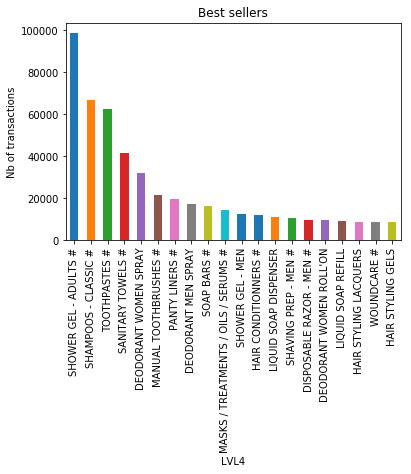

In [45]:
import matplotlib.pyplot as plt 

fig, ax=plt.subplots(figsize=(6,4))
hb['nomenclature_lvl4_sde'].value_counts().sort_values(ascending=False).head(20).plot(kind="bar")
plt.xlabel('LVL4')
plt.ylabel('Nb of transactions')
#ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best sellers')

In [169]:
hb['nomenclature_lvl4_sde'].value_counts()

BODY CLEANSING                    158369
DENTAL HYGIENE                    113595
HAIR CARE                         107840
FEMALE HYGIENE                     75634
DEODORANTS                         69283
SHAVING AND EPILATION - MEN        27626
HAIR STYLING                       26347
SHAVING AND EPILATION - WOMEN      16511
HEALTH AND CARE                    16127
INCONTINENCE                       10182
SEXUAL CARE                         4543
FOOT CARE                           3377
HYGIENE - TRAVEL SIZE               1668
BEAUTY ACCESSORIES                   480
FACE CARE AND CLEANING - WOMEN       394
PADS AND REMOVERS                    245
BODY / HANDS / LIP CARE              138
BEAUTY PRODUCT GIFT SETS               5
ETHNIC PRODUCTS                        1
Name: nomenclature_lvl2_sde, dtype: int64

#### Pre-Processing : pivot de la table

In [179]:
basketHBr = basketHB[basketHB['nomenclature_lvl3_sde'] =='SHAMPOOS']
basketHBt=basketHBr.pivot_table(index='sid_customer',columns='LVL4_marque',values='product_qty',fill_value=0)
print(basketHBt.shape)

(28962, 58)


In [180]:
frequent_itemsets = apriori(basketHBt, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.043954,(SHAMPOOS - CHILDRENULTRA DOUX)
1,0.136765,(SHAMPOOS - CLASSIC #COSMIA)
2,0.078655,(SHAMPOOS - CLASSIC #DESSANGE)
3,0.176749,(SHAMPOOS - CLASSIC #DOP)
4,0.235723,(SHAMPOOS - CLASSIC #ELSEVE)
5,0.046164,(SHAMPOOS - CLASSIC #FRANCK PROVOST)
6,0.049789,(SHAMPOOS - CLASSIC #FRUCTIS)
7,0.040329,(SHAMPOOS - CLASSIC #GLISS)
8,0.150956,(SHAMPOOS - CLASSIC #HEAD & SHOULDERS)
9,0.105759,(SHAMPOOS - CLASSIC #LE PETIT MARSEILLAIS)


### Modèle

In [181]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SHAMPOOS - CLASSIC #ULTRA DOUX),(SHAMPOOS - CLASSIC #LE PETIT MARSEILLAIS),0.210552,0.105759,0.030557,0.145130,1.372263,0.008289,1.046054
1,(SHAMPOOS - CLASSIC #LE PETIT MARSEILLAIS),(SHAMPOOS - CLASSIC #ULTRA DOUX),0.105759,0.210552,0.030557,0.288932,1.372263,0.008289,1.110230


### Interprétation

Leverage- It is the difference between frequency of antecedent and consequent together in transactions to frequency of both in independent transactions. 
5.Conviction- A higher conviction score means that consequent is highly dependent on antecedent.